### Importação dos dados



In [58]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# acrescentando loja
loja1['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

loja2.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Cadeira de escritório,moveis,378.20,20.421138,04/08/2021,Thiago Silva,MG,1,boleto,1,-18.10,-44.38,Loja 2
1,Pandeiro,instrumentos musicais,102.37,3.035334,26/11/2020,Bianca Santos,RJ,3,cartao_credito,4,-22.25,-42.66,Loja 2
2,Cama king,moveis,591.13,31.759020,22/10/2021,Thiago Silva,SC,5,cartao_credito,10,-27.45,-50.95,Loja 2
3,Cama king,moveis,1208.24,61.919584,04/05/2022,Larissa Alves,RS,5,cartao_credito,10,-30.17,-53.50,Loja 2
4,Cadeira de escritório,moveis,530.41,25.827176,26/02/2022,Lucas Oliveira,SP,4,cartao_credito,3,-22.19,-48.79,Loja 2


In [59]:
loja2.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Cadeira de escritório,moveis,378.20,20.421138,04/08/2021,Thiago Silva,MG,1,boleto,1,-18.10,-44.38,Loja 2
1,Pandeiro,instrumentos musicais,102.37,3.035334,26/11/2020,Bianca Santos,RJ,3,cartao_credito,4,-22.25,-42.66,Loja 2
2,Cama king,moveis,591.13,31.759020,22/10/2021,Thiago Silva,SC,5,cartao_credito,10,-27.45,-50.95,Loja 2
3,Cama king,moveis,1208.24,61.919584,04/05/2022,Larissa Alves,RS,5,cartao_credito,10,-30.17,-53.50,Loja 2
4,Cadeira de escritório,moveis,530.41,25.827176,26/02/2022,Lucas Oliveira,SP,4,cartao_credito,3,-22.19,-48.79,Loja 2


#1. Análise do faturamento


In [60]:
# ajustando data
df = pd.concat([loja1, loja2, loja3, loja4])
df['Data da Compra'] = pd.to_datetime(df['Data da Compra'], format='%d/%m/%Y', errors='coerce')
df['Ano'] = df['Data da Compra'].dt.year

# calculando venda por ano
vendas_ano = df.groupby(['Loja', 'Ano'])['Preço'].sum().reset_index()

print("Vendas por Loja e por Ano:")
display(vendas_ano)

Vendas por Loja e por Ano:


,Loja,Ano,Preço
0,Loja 1,2020,491911.51
1,Loja 1,2021,482829.91
2,Loja 1,2022,422086.24
3,Loja 1,2023,137681.46
4,Loja 2,2020,427288.25
5,Loja 2,2021,468288.89
6,Loja 2,2022,477635.56
7,Loja 2,2023,115246.36
8,Loja 3,2020,428943.09
9,Loja 3,2021,483938.91


In [61]:
# vendas por loja e por ano
print("Vendas por Loja e por Ano:")
display(vendas_ano)

# vendas por loja total
total_vendas_loja = vendas_ano.groupby('Loja')['Preço'].sum().reset_index()
print("\nTotal de Vendas por Loja:")
display(total_vendas_loja)

Vendas por Loja e por Ano:


,Loja,Ano,Preço
0,Loja 1,2020,491911.51
1,Loja 1,2021,482829.91
2,Loja 1,2022,422086.24
3,Loja 1,2023,137681.46
4,Loja 2,2020,427288.25
5,Loja 2,2021,468288.89
6,Loja 2,2022,477635.56
7,Loja 2,2023,115246.36
8,Loja 3,2020,428943.09
9,Loja 3,2021,483938.91



Total de Vendas por Loja:


,Loja,Preço
0,Loja 1,1534509.12
1,Loja 2,1488459.06
2,Loja 3,1464025.03
3,Loja 4,1384497.58


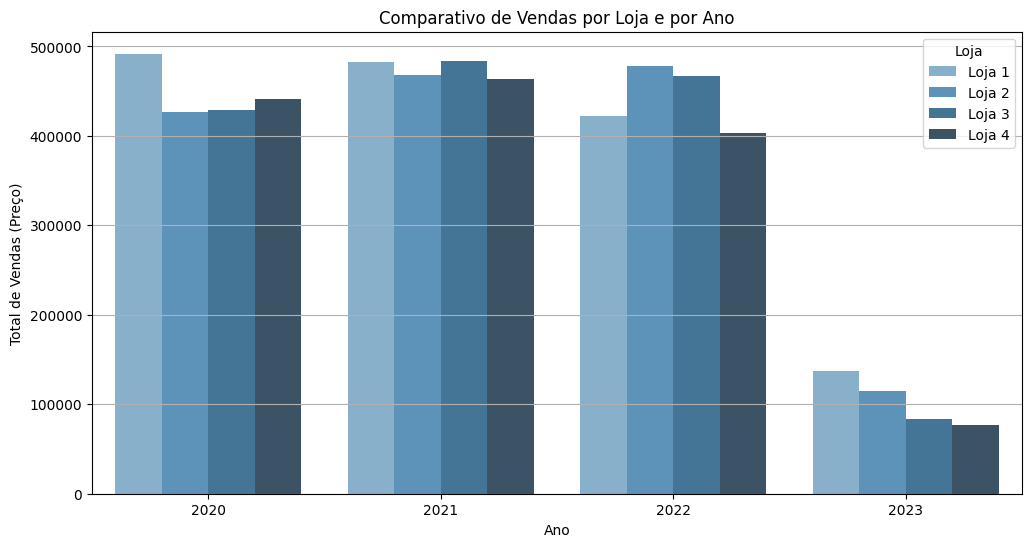

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

#grafico de barras para comparar o desempenho das lojas

plt.figure(figsize=(12, 6))
sns.barplot(data=vendas_ano, x='Ano', y='Preço', hue='Loja', palette='Blues_d')
plt.title('Comparativo de Vendas por Loja e por Ano')
plt.xlabel('Ano')
plt.ylabel('Total de Vendas (Preço)')
plt.grid(axis='y')
plt.show()

# 2. Vendas por Categoria


In [63]:
# vendas por categoria e loja
vendas_categoria = df.groupby(['Loja', 'Categoria do Produto'])['Preço'].sum().reset_index()


print("Vendas por Loja e Categoria de produto:")
display(vendas_categoria)

Vendas por Loja e Categoria de produto:


,Loja,Categoria do Produto,Preço
0,Loja 1,brinquedos,23993.78
1,Loja 1,eletrodomesticos,484913.36
2,Loja 1,eletronicos,572659.23
3,Loja 1,esporte e lazer,52387.55
4,Loja 1,instrumentos musicais,121731.69
5,Loja 1,livros,11713.92
6,Loja 1,moveis,250178.11
7,Loja 1,utilidades domesticas,16931.48
8,Loja 2,brinquedos,21262.21
9,Loja 2,eletrodomesticos,464758.13


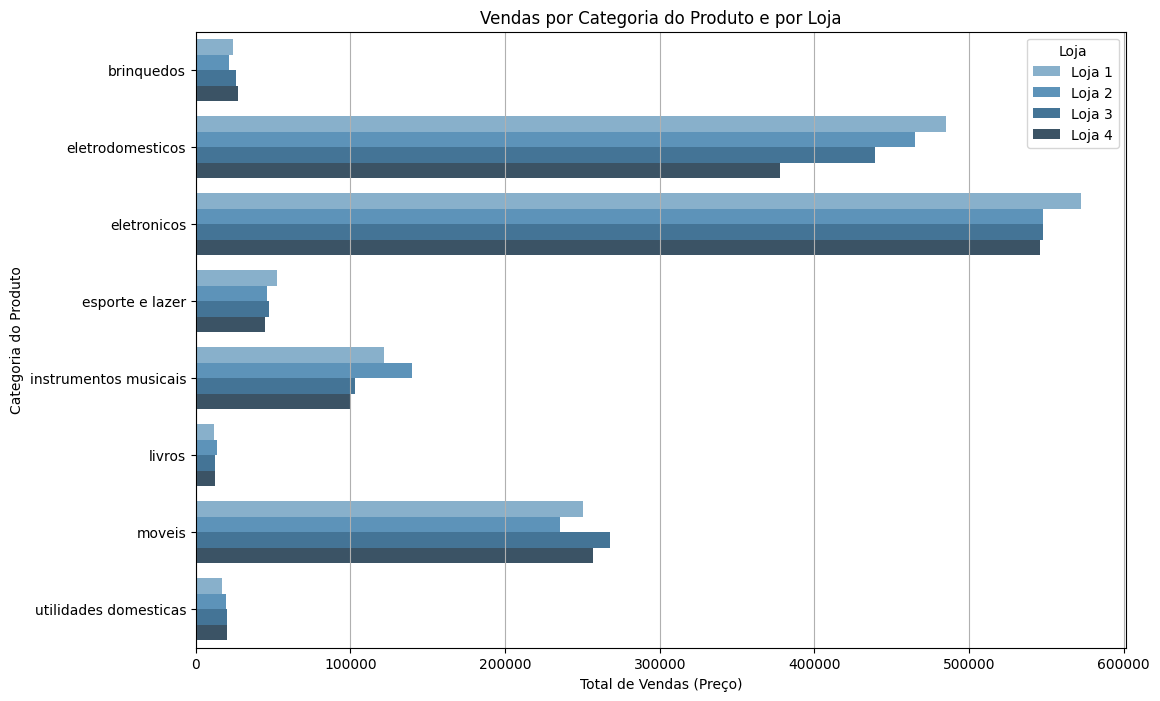

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(data=vendas_categoria, y='Categoria do Produto', x='Preço', hue='Loja', palette='Blues_d')
plt.title('Vendas por Categoria do Produto e por Loja')
plt.xlabel('Total de Vendas (Preço)')
plt.ylabel('Categoria do Produto')
plt.legend(title='Loja')
plt.grid(axis='x')
plt.show()

# 3. Média de Avaliação das Lojas

In [65]:
# média por ano
avaliacao_loja_ano = df.groupby(['Loja', 'Ano'])['Avaliação da compra'].mean().reset_index()

print("Média de Avaliação da Compra por Loja e por Ano:")
display(avaliacao_loja_ano)

Média de Avaliação da Compra por Loja e por Ano:


,Loja,Ano,Avaliação da compra
0,Loja 1,2020,3.932867
1,Loja 1,2021,3.960758
2,Loja 1,2022,4.042076
3,Loja 1,2023,3.958333
4,Loja 2,2020,4.041429
5,Loja 2,2021,3.997365
6,Loja 2,2022,4.097458
7,Loja 2,2023,3.958333
8,Loja 3,2020,4.122682
9,Loja 3,2021,3.925676


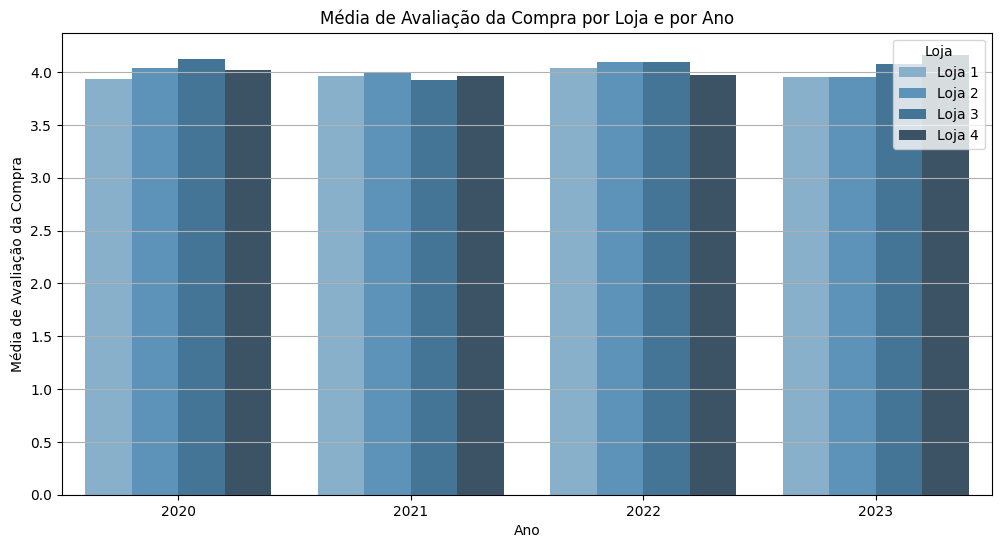

In [66]:
plt.figure(figsize=(12, 6))
sns.barplot(data=avaliacao_loja_ano, x='Ano', y='Avaliação da compra', hue='Loja', palette='Blues_d')
plt.title('Média de Avaliação da Compra por Loja e por Ano')
plt.xlabel('Ano')
plt.ylabel('Média de Avaliação da Compra')
plt.grid(axis='y')
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [67]:
#agrupando vendas

produtos_agrupados = df.groupby(['Produto'])['Preço'].sum().reset_index()

#mais vendidos
produtos_agrupados.head(4)

,Produto,Preço
0,Assistente virtual,45956.59
1,Bateria,197074.45
2,Bicicleta,128648.29
3,Blocos de montar,9069.86


In [68]:
#menos vendidos
produtos_agrupados.tail(4)

,Produto,Preço
47,TV Led UHD 4K,576652.70
48,Tablet ABXY,292016.76
49,Violão,78530.63
50,Xadrez de madeira,6865.90


# 5. Frete Médio por Loja


In [69]:
# média frete
media_frete_loja = df.groupby('Loja')['Frete'].mean().reset_index()

print("Frete Médio por Loja:")
display(media_frete_loja)

Frete Médio por Loja:


,Loja,Frete
0,Loja 1,34.691805
1,Loja 2,33.621941
2,Loja 3,33.074464
3,Loja 4,31.278997


/tmp/ipython-input-70-58891235.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=media_frete_loja, x='Loja', y='Frete', palette='Blues_d')


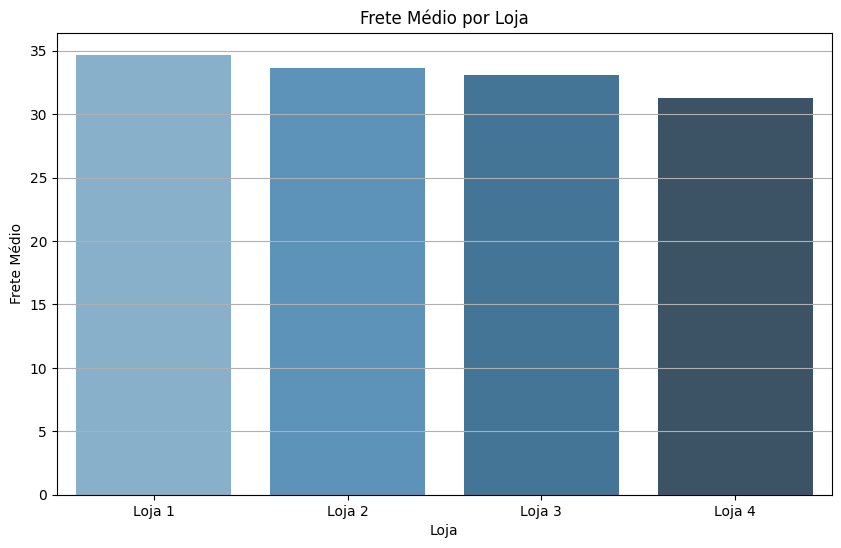

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(data=media_frete_loja, x='Loja', y='Frete', palette='Blues_d')
plt.title('Frete Médio por Loja')
plt.xlabel('Loja')
plt.ylabel('Frete Médio')
plt.grid(axis='y')
plt.show()

### Relatório


Baseado especialmente na análise por faturamento, podemos concluir que a melhor opção é vender a Loja 4, já que ela vem apresentando ano após ano desempenho menor que as demais.

In [ ]:
# 6. Extra



# Visualização de distribuição de vendas


/tmp/ipython-input-73-3608838530.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='lon', y='lat', size='Preço', sizes=(20, 200), alpha=0.6, palette='Blues_d', legend=False)


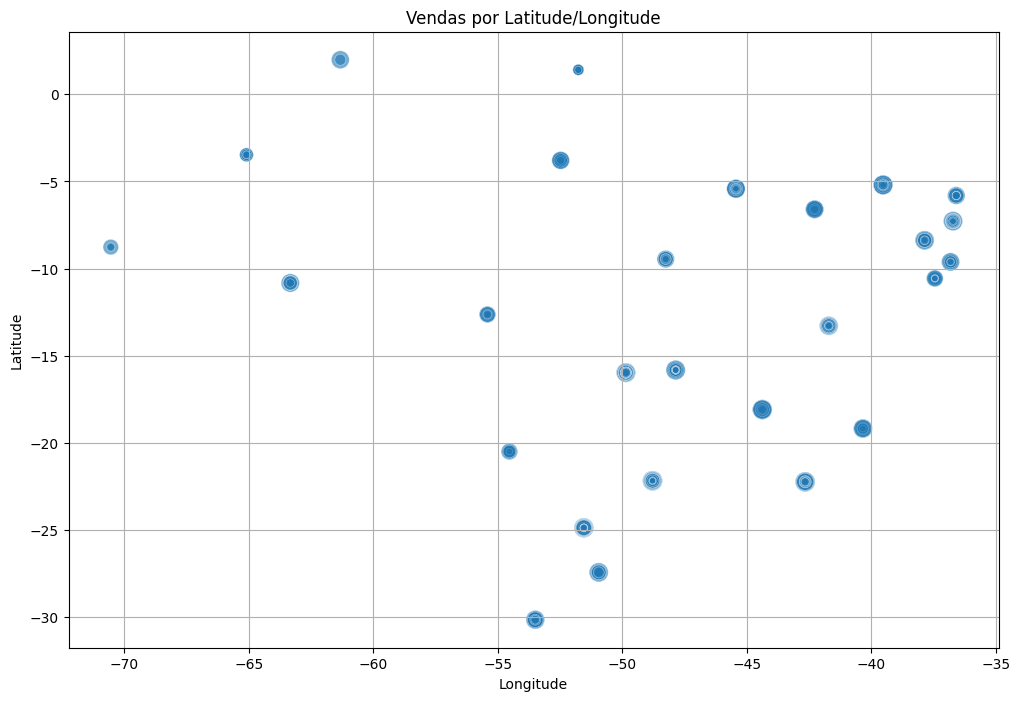

In [73]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='lon', y='lat', size='Preço', sizes=(20, 200), alpha=0.6, palette='Blues_d', legend=False)
plt.title('Vendas por Latitude/Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

/tmp/ipython-input-74-341301315.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_loja, x='lon', y='lat', size='Preço', sizes=(20, 200), alpha=0.6, palette='Blues_d', legend=False)


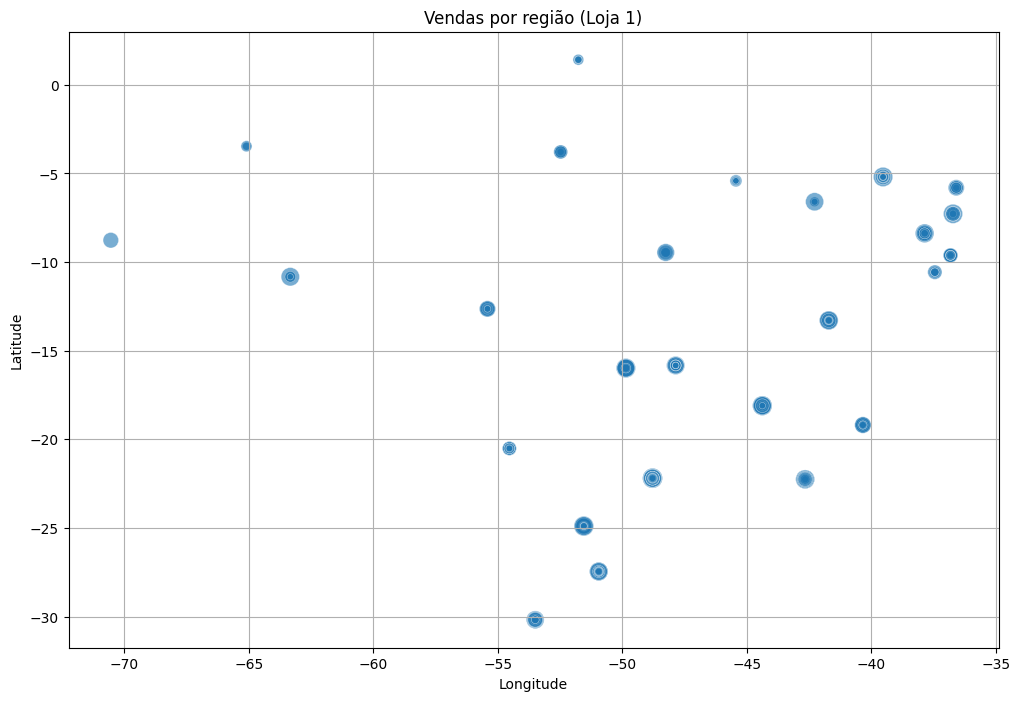

/tmp/ipython-input-74-341301315.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_loja, x='lon', y='lat', size='Preço', sizes=(20, 200), alpha=0.6, palette='Blues_d', legend=False)


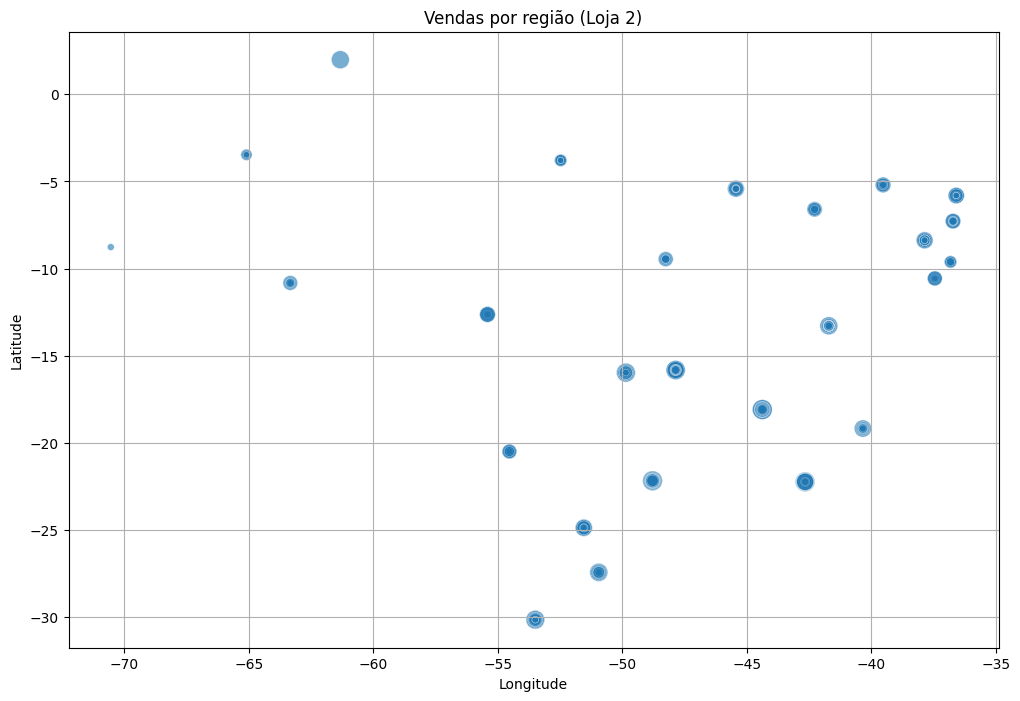

/tmp/ipython-input-74-341301315.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_loja, x='lon', y='lat', size='Preço', sizes=(20, 200), alpha=0.6, palette='Blues_d', legend=False)


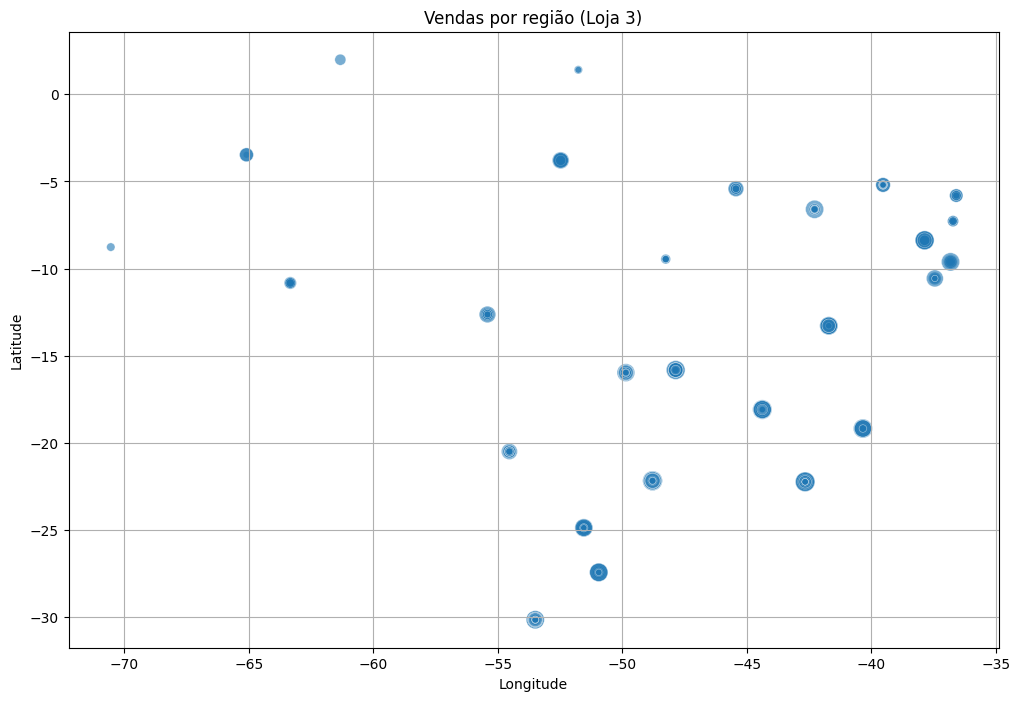

/tmp/ipython-input-74-341301315.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_loja, x='lon', y='lat', size='Preço', sizes=(20, 200), alpha=0.6, palette='Blues_d', legend=False)


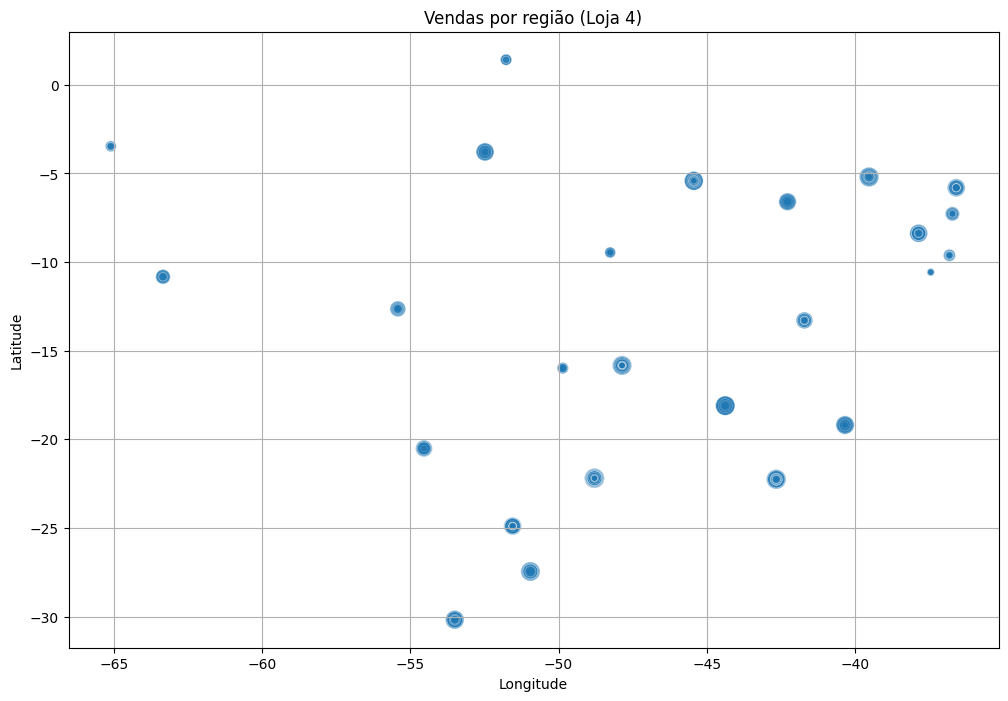

In [74]:
lojas = df['Loja'].unique()

for loja in lojas:
    plt.figure(figsize=(12, 8))
    df_loja = df[df['Loja'] == loja]
    sns.scatterplot(data=df_loja, x='lon', y='lat', size='Preço', sizes=(20, 200), alpha=0.6, palette='Blues_d', legend=False)
    plt.title(f'Vendas por região ({loja})')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.show()

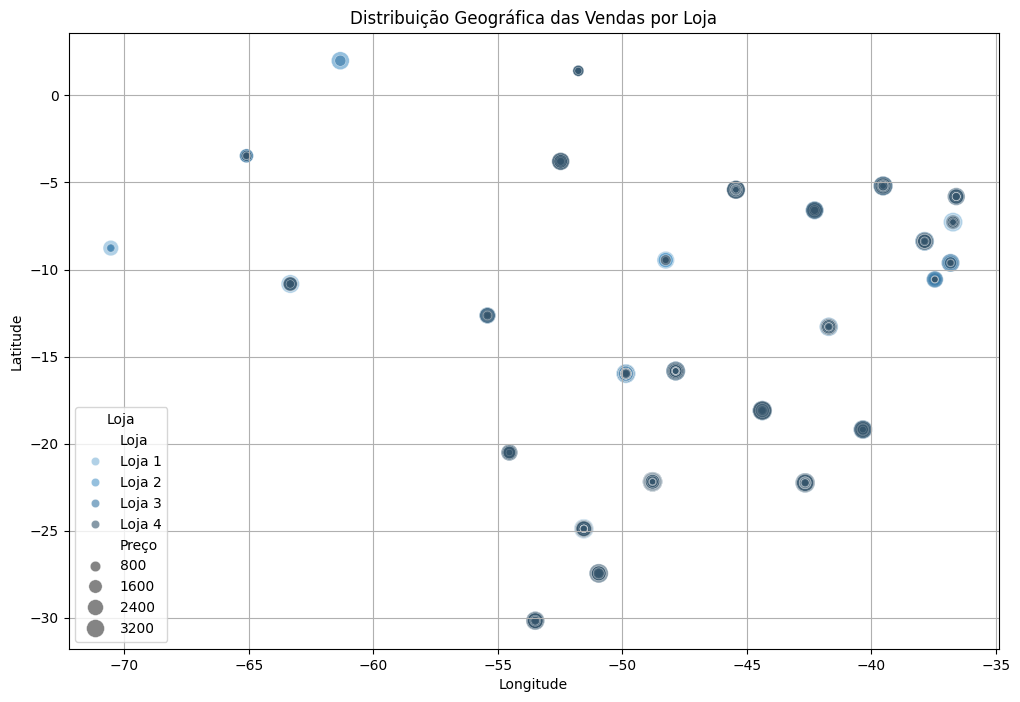

In [76]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='lon', y='lat', hue='Loja', size='Preço', sizes=(20, 200), alpha=0.6, palette='Blues_d',)
plt.title('Distribuição Geográfica das Vendas por Loja')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend(title='Loja')
plt.show()